# Foundations of Artificial Intelligence and Machine Learning
## A Program by IIIT-H and TalentSprint
#### To be done in the Lab

The objective of this experiment is to understand how data negatively impacts the performance of the model.

In this experiment we will use famous Iris data set.This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. 

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

#### Data Attributes

  1. sepal length in cm 
  2. sepal width in cm 
  3. petal length in cm 
  4. petal width in cm 
  5. class: 
     -- Iris Setosa  
     -- Iris Versicolour 
     -- Iris Virginica

#### Overfitting

Overfitting refers to a model that models the training data too well.

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. 

In this experiment we are going to use 2 features from Iris Dataset to Visualise Overfitting step by step.
  1. Plot training error and Test error
  2. Observe when the overfitting starts in the plot.

In [1]:
## Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Loading the dataset from sklearn package

In [2]:
# Loading iris dataset from sklearn
iris = datasets.load_iris()
## Storing only 2 features 
X = iris.data[:,(0,2)]
## Storing the target data
Y = iris.target

In [3]:
np.split(X, [3, 5])[0]

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3]])

#### Exercise 1 

Split the data into train,test and validation sets.

In [4]:
samples_n = len(Y)

In [5]:

X_train, X_test, X_validation = np.split(X, [int(0.6*samples_n), int(0.8*samples_n)])
Y_train, Y_test, Y_validation = np.split(Y, [int(0.6*samples_n), int(0.8*samples_n)])

In [6]:
## Linear function
def linf(m, x):
    return np.matmul(x,m)

def one_step(x, y, m, eta):
    #Predicting the values
    ypred = linf(m, x)
    #Calculating the error
    error = np.linalg.norm((y - ypred)**2)
    #calculating the delta value
    delta_m = -2*np.matmul(x.T,(y - ypred))
    #updating m value
    m = m - (delta_m * eta)
    return m, error

#### Exercise 2 

Calculate the test error

In [7]:
num_feat = len(X_train[0]) 
#Intilizing the m value with random value
m = np.random.uniform(-1,1,(num_feat+1,1))
# Learning rate
eta = 2e-4
train_errs = []
test_errs = []
#reshaping the size of Y_test array
Y_test = np.reshape(Y_test, (Y_test.shape[0],1))
#reshaping the size of Y_train array
Y_train = np.reshape(Y_train, (Y_train.shape[0],1))
## adding additional ones to X_train and X_test arrays
X_train=np.hstack( (X_train,np.ones((X_train.shape[0],1)))) 
X_test=np.hstack( (X_test,np.ones((X_test.shape[0],1)))) 

for times in range(50):
    ## Calling the function
    m, error = one_step(X_train, Y_train, m, eta)
    if times%1==0:
        # appending the trained error to train_errs
        train_errs.append(error)
        # Calculating the test errors and appending them to test_errs
        ypred = linf(m, X_test)
        error_test = np.linalg.norm((Y_test - ypred)**2)
        test_errs.append(error_test)

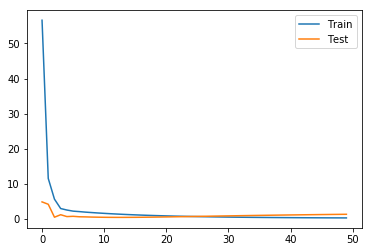

In [8]:
## Plotting the train_errs and test_errs
plt.plot(train_errs)
plt.plot(test_errs)
plt.legend(["Train","Test"])
plt.show()

In [9]:
print('\nMinimum Training Error occurs at {} degree '.format(int(np.argmin(train_errs))))
print('Minimum Testing Error occurs at {} degree\n'.format(int(np.argmin(test_errs))))


Minimum Training Error occurs at 49 degree 
Minimum Testing Error occurs at 13 degree



#### Exercise 3

Vary the train ,test and validation ratios and observe how overfitting changes.